# 1. File Preperation 

In [54]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import pearsonr


In [55]:
# Define the font properties
#font = {'family': 'sans-serif',
       # 'size': 14}

# Apply the font settings globally for Matplotlib
#plt.rc('font', **font)

# Apply the font settings globally for Seaborn
#sns.set_context("notebook", rc={"font.family": font['family'], "font.size": font['size']})


In [56]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [57]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final_Cleaned.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final_Cleaned.csv')

In [58]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [59]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

data_helpful = data[data['helpful_vote'] != 0]


# 2. Statistic of features

First of all we want to look at different features that could be extracted from the review data. Therefore I built some functions for easier data handling and statistical analysis of the features. 

## Functions for Building Summary statistic 

In [60]:
# Convert Sentiment_Classification to Numerical
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Map the sentiment column to numerical values
data_helpful['SentimentC'] = data_helpful['Sentiment_Classification'].map(sentiment_mapping)
data['SentimentC'] = data['Sentiment_Classification'].map(sentiment_mapping)

data_utilitarian['SentimentC'] = data_utilitarian['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic['SentimentC'] = data_hedonic['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic_raw['SentimentC'] = data_hedonic_raw['Sentiment_Classification'].map(sentiment_mapping)
data_utilitarian_raw['SentimentC'] = data_utilitarian_raw['Sentiment_Classification'].map(sentiment_mapping)

In [61]:
# Function for building summary statistics for numerical columns

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ['Rating','RewExt','Sentiment','Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
            'Image', 'VerPur', 'NounR', 'AdjR', 'AdvR', 'FRE']

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'median', 'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transposing the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

In [62]:
# Only calculate for the mean of the numerical columns

def calculate_mean(df, groupby_column):
    # Group by the specified column and calculate aggregate statistics
    summary_mean = df.groupby(groupby_column).agg({
        'helpful_ratio': ['mean'],  # Calculate the mean of the 'helpful_ratio' column
        'Rating': ['mean'],
        'RewExt': ['mean'],
        'Sentiment': ['mean'],
        'Subjective': ['mean'],
        'ElapDays': ['mean'],
        'WordC': ['mean'],
        'SentC': ['mean'],
        'SentL': ['mean'],
        'TitleL': ['mean'],
        'FRE': ['mean'],
        'AdjR': ['mean'],
        'AdvR': ['mean'],
        'NounR': ['mean'],
    })

    # Flatten the MultiIndex columns
    summary_mean.columns = ['_'.join(col).strip() for col in summary_mean.columns.values]

    # Transpose the DataFrame
    summary_mean = summary_mean.transpose()

    return summary_mean

### Summary Statistic of Helpful Reviews

In the following, a straightforward statistical analysis is conducted without graphical representation, focusing on various factors such as product type or main category.

In [63]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')

prod_type                     0            1
helpful_ratio_mean     0.001076     0.000968
Rating_mean            2.913549     4.216673
RewExt_mean           -1.701829    -0.368269
Sentiment_mean         2.933084     4.262486
Subjective_mean        0.793801     0.841128
ElapDays_mean       1047.099335  1639.081112
WordC_mean            49.413965    42.653774
SentC_mean             3.626766     3.378520
SentL_mean            15.856220    14.403719
TitleL_mean            1.076891     1.221179
FRE_mean              80.032851    84.562978
AdjR_mean              0.094385     0.099744
AdvR_mean              0.078255     0.069963
NounR_mean             0.188121     0.183800


In [64]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'main_category')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Category_mean.csv')

main_category        Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean     0.001051     0.000650     0.000894    0.001463   
Rating_mean            2.591216     4.363366     2.882450    3.290429   
RewExt_mean           -2.108784    -0.175693    -1.749338   -1.209571   
Sentiment_mean         2.636824     4.399505     2.883278    3.321782   
Subjective_mean        0.787390     0.839543     0.791227    0.805197   
ElapDays_mean       1235.219595  1880.858416  1336.201159  287.029703   
WordC_mean            55.108108    43.309901    53.655629   35.396040   
SentC_mean             4.118243     3.393069     3.713576    2.973597   
SentL_mean            15.423876    14.614093    16.723516   14.549707   
TitleL_mean            1.081081     1.195050     1.060430    1.105611   
FRE_mean              77.791520    84.535010    78.814719   84.650627   
AdjR_mean              0.079573     0.102059     0.091718    0.114171   
AdvR_mean              0.071219     0.071861     0.

In [65]:
# Summary of data after helpful reviews
summary_help_hedonic = calculate_mean(data_hedonic, 'Prod')

# Display the DataFrame
print(summary_help_hedonic)

# Saving to CSV
summary_help_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Hedonic_mean.csv')

Prod                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean      0.000650    0.001870     0.000650     0.002056
Rating_mean             4.411860    3.117647     4.287706     4.335312
RewExt_mean            -0.088140   -1.533333    -0.312294    -0.464688
Sentiment_mean          4.451665    3.336601     4.318124     4.281899
Subjective_mean         0.842705    0.864032     0.834608     0.829831
ElapDays_mean        1931.475223  753.114379  1801.885932   994.320475
WordC_mean             43.642567   42.712418    42.790875    38.667656
SentC_mean              3.393176    3.758170     3.392902     2.946588
SentL_mean             14.171538   13.150530    15.304567    14.280635
TitleL_mean             1.190089    1.264706     1.202788     1.338279
FRE_mean               83.979439   83.972974    85.401812    85.266350
AdjR_mean               0.099465    0.102380     0.106106     0.083474
AdvR_mean               0.071782    0.065832     0.071984     0.062336
NounR_

In [66]:
# Summary of data after helpful reviews
summary_help_ut = calculate_mean(data_utilitarian, 'Prod')

# Display the DataFrame
print(summary_help_ut)

# Saving to CSV
summary_help_ut.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Utilitarian_mean.csv')

Prod                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean     0.000570     0.001051      0.001590      0.001463
Rating_mean            3.010922     2.591216      2.606771      3.290429
RewExt_mean           -1.589078    -2.108784     -2.093229     -1.209571
Sentiment_mean         2.983010     2.636824      2.669271      3.321782
Subjective_mean        0.785645     0.787390      0.803203      0.805197
ElapDays_mean       1527.654126  1235.219595    925.375000    287.029703
WordC_mean            46.288835    55.108108     69.463542     35.396040
SentC_mean             3.480583     4.118243      4.213542      2.973597
SentL_mean            15.521164    15.423876     19.303563     14.549707
TitleL_mean            1.064320     1.081081      1.052083      1.105611
FRE_mean              79.166578    77.791520     78.059687     84.650627
AdjR_mean              0.090716     0.079573      0.093867      0.114171
AdvR_mean              0.082213     0.071219      0

### Analyzing Mean of Review Data

In [67]:
# Calculating Mean for Data after Main category 
summary_mean = calculate_mean(data, 'main_category')

# Display the summary statistics
print(summary_mean)

# Saving to CSV
summary_mean.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Category_mean.csv')

main_category        Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean     0.000129     0.000099     0.000108    0.000551   
Rating_mean            4.087073     4.517071     4.028722    3.894344   
RewExt_mean           -0.612927    -0.038718    -0.606672   -0.605656   
Sentiment_mean         3.992554     4.546635     3.993418    3.849596   
Subjective_mean        0.797069     0.816395     0.796116    0.787308   
ElapDays_mean       1174.901758  1738.872514  1414.395133  301.046613   
WordC_mean            24.962565    24.512944    33.539543   24.442511   
SentC_mean             2.319959     2.337735     2.625312    2.325668   
SentL_mean            11.234538    11.536742    13.754904   11.953225   
TitleL_mean            1.262668     1.436332     1.200459    1.251088   
FRE_mean              79.973698    87.551318    81.480999   85.431585   
AdjR_mean              0.127735     0.126783     0.114616    0.133952   
AdvR_mean              0.071223     0.071665     0.

In [68]:
# Calculating Mean after Producty Type and Data 
summary_stats_data = calculate_mean(data, 'prod_type')

# Print the summary statistics
print(summary_stats_data)

# Saving to CSV
summary_stats_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType_mean.csv')

prod_type                     0            1
helpful_ratio_mean     0.000157     0.000151
Rating_mean            4.032724     4.505747
RewExt_mean           -0.608409    -0.089749
Sentiment_mean         3.979115     4.525158
Subjective_mean        0.795535     0.817122
ElapDays_mean       1235.333252  1554.905817
WordC_mean            30.133143    24.434670
SentC_mean             2.506405     2.329287
SentL_mean            12.839060    11.485356
TitleL_mean            1.223666     1.450328
FRE_mean              81.424457    87.626165
AdjR_mean              0.120356     0.120690
AdvR_mean              0.080517     0.068978
NounR_mean             0.194339     0.192187


In [69]:
# Calculating Mean for hedonic products and product
summary_stats_hedonic = calculate_mean(data_hedonic, 'Prod')

# Display results
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic_mean.csv')

Prod                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean      0.000650    0.001870     0.000650     0.002056
Rating_mean             4.411860    3.117647     4.287706     4.335312
RewExt_mean            -0.088140   -1.533333    -0.312294    -0.464688
Sentiment_mean          4.451665    3.336601     4.318124     4.281899
Subjective_mean         0.842705    0.864032     0.834608     0.829831
ElapDays_mean        1931.475223  753.114379  1801.885932   994.320475
WordC_mean             43.642567   42.712418    42.790875    38.667656
SentC_mean              3.393176    3.758170     3.392902     2.946588
SentL_mean             14.171538   13.150530    15.304567    14.280635
TitleL_mean             1.190089    1.264706     1.202788     1.338279
FRE_mean               83.979439   83.972974    85.401812    85.266350
AdjR_mean               0.099465    0.102380     0.106106     0.083474
AdvR_mean               0.071782    0.065832     0.071984     0.062336
NounR_

In [70]:
# Calculating Mean for utilitarian products and product
summary_stats_utilitarian = calculate_mean(data_utilitarian, 'Prod')

# Display results
print(summary_stats_utilitarian)

# Saving to CSV
summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian_mean.csv')

Prod                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean     0.000570     0.001051      0.001590      0.001463
Rating_mean            3.010922     2.591216      2.606771      3.290429
RewExt_mean           -1.589078    -2.108784     -2.093229     -1.209571
Sentiment_mean         2.983010     2.636824      2.669271      3.321782
Subjective_mean        0.785645     0.787390      0.803203      0.805197
ElapDays_mean       1527.654126  1235.219595    925.375000    287.029703
WordC_mean            46.288835    55.108108     69.463542     35.396040
SentC_mean             3.480583     4.118243      4.213542      2.973597
SentL_mean            15.521164    15.423876     19.303563     14.549707
TitleL_mean            1.064320     1.081081      1.052083      1.105611
FRE_mean              79.166578    77.791520     78.059687     84.650627
AdjR_mean              0.090716     0.079573      0.093867      0.114171
AdvR_mean              0.082213     0.071219      0

### Total Analysis (mean, median, variance)

In [71]:
# Summary of hedonic data
summary_stats_hedonic = summary_statistic(data_hedonic_raw, 'Prod')

# Display the summary statistics
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic.csv')


Prod               Facial Spray       Music      Perfume  Video Games
Rating_mean            4.489647    4.196532     4.538803     4.658210
Rating_median          5.000000    5.000000     5.000000     5.000000
Rating_std             1.062818    1.347630     0.988470     0.909300
RewExt_mean           -0.010353   -0.454078    -0.061197    -0.141790
RewExt_median          0.500000    0.200000     0.400000     0.200000
RewExt_std             1.062818    1.330917     0.988470     0.909300
Sentiment_mean         4.532417    4.183687     4.557902     4.638376
Sentiment_median       5.000000    5.000000     5.000000     5.000000
Sentiment_std          1.094174    1.380051     1.020889     0.967990
Subjective_mean        0.833676    0.833423     0.802700     0.809889
Subjective_median      0.916007    0.927935     0.891810     0.910194
Subjective_std         0.190402    0.211367     0.216171     0.228808
WordC_mean            28.854379   24.554913    21.072495    23.867159
WordC_median        

In [72]:
# Summary of utilitarian data
summary_stats_utilitarian = summary_statistic(data_utilitarian_raw, 'Prod')

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian.csv')

Prod                   Battery       Filter  Gaming Mouse  Toilet Paper
Rating_mean           4.066996     4.087073      3.958862      3.894344
Rating_median         5.000000     5.000000      5.000000      5.000000
Rating_std            1.468780     1.509475      1.499342      1.485845
RewExt_mean          -0.533004    -0.612927     -0.741138     -0.605656
RewExt_median         0.400000     0.300000      0.300000      0.500000
RewExt_std            1.468780     1.509475      1.499342      1.485845
Sentiment_mean        4.041371     3.992554      3.905889      3.849596
Sentiment_median      5.000000     5.000000      5.000000      5.000000
Sentiment_std         1.580280     1.604950      1.548408      1.570801
Subjective_mean       0.777173     0.797069      0.830693      0.787308
Subjective_median     0.846622     0.859873      0.892275      0.833994
Subjective_std        0.210792     0.193269      0.172787      0.184636
WordC_mean           25.592621    24.962565     48.045083     24

In [73]:
# Summary of data after Product Type
summary_stats_prodType = summary_statistic(data, 'prod_type')

# Display the DataFrame
print(summary_stats_prodType)

#Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType.csv')

prod_type                    0            1
Rating_mean           4.032724     4.505747
Rating_median         5.000000     5.000000
Rating_std            1.490414     1.048483
RewExt_mean          -0.608409    -0.089749
RewExt_median         0.300000     0.400000
RewExt_std            1.490972     1.047844
Sentiment_mean        3.979115     4.525158
Sentiment_median      5.000000     5.000000
Sentiment_std         1.581097     1.083359
Subjective_mean       0.795535     0.817122
Subjective_median     0.861007     0.906036
Subjective_std        0.196477     0.209393
WordC_mean           30.133143    24.434670
WordC_median         19.000000    16.000000
WordC_std            31.005551    25.220262
SentC_mean            2.506405     2.329287
SentC_median          2.000000     2.000000
SentC_std             1.862764     1.675234
SentL_mean           12.839060    11.485356
SentL_median         11.166667    10.000000
SentL_std             8.070446     7.361829
TitleL_mean           1.223666  

# 3. Correlation Analysis


In [74]:
features =  ['helpful_ratio','Rating','RewExt','Sentiment','Subjective', 'ElapDays',
            'Image', 'VerPur','WordC', 'SentC', 'SentL', 'TitleL',  'NounR', 'AdjR', 'AdvR', 'FRE']

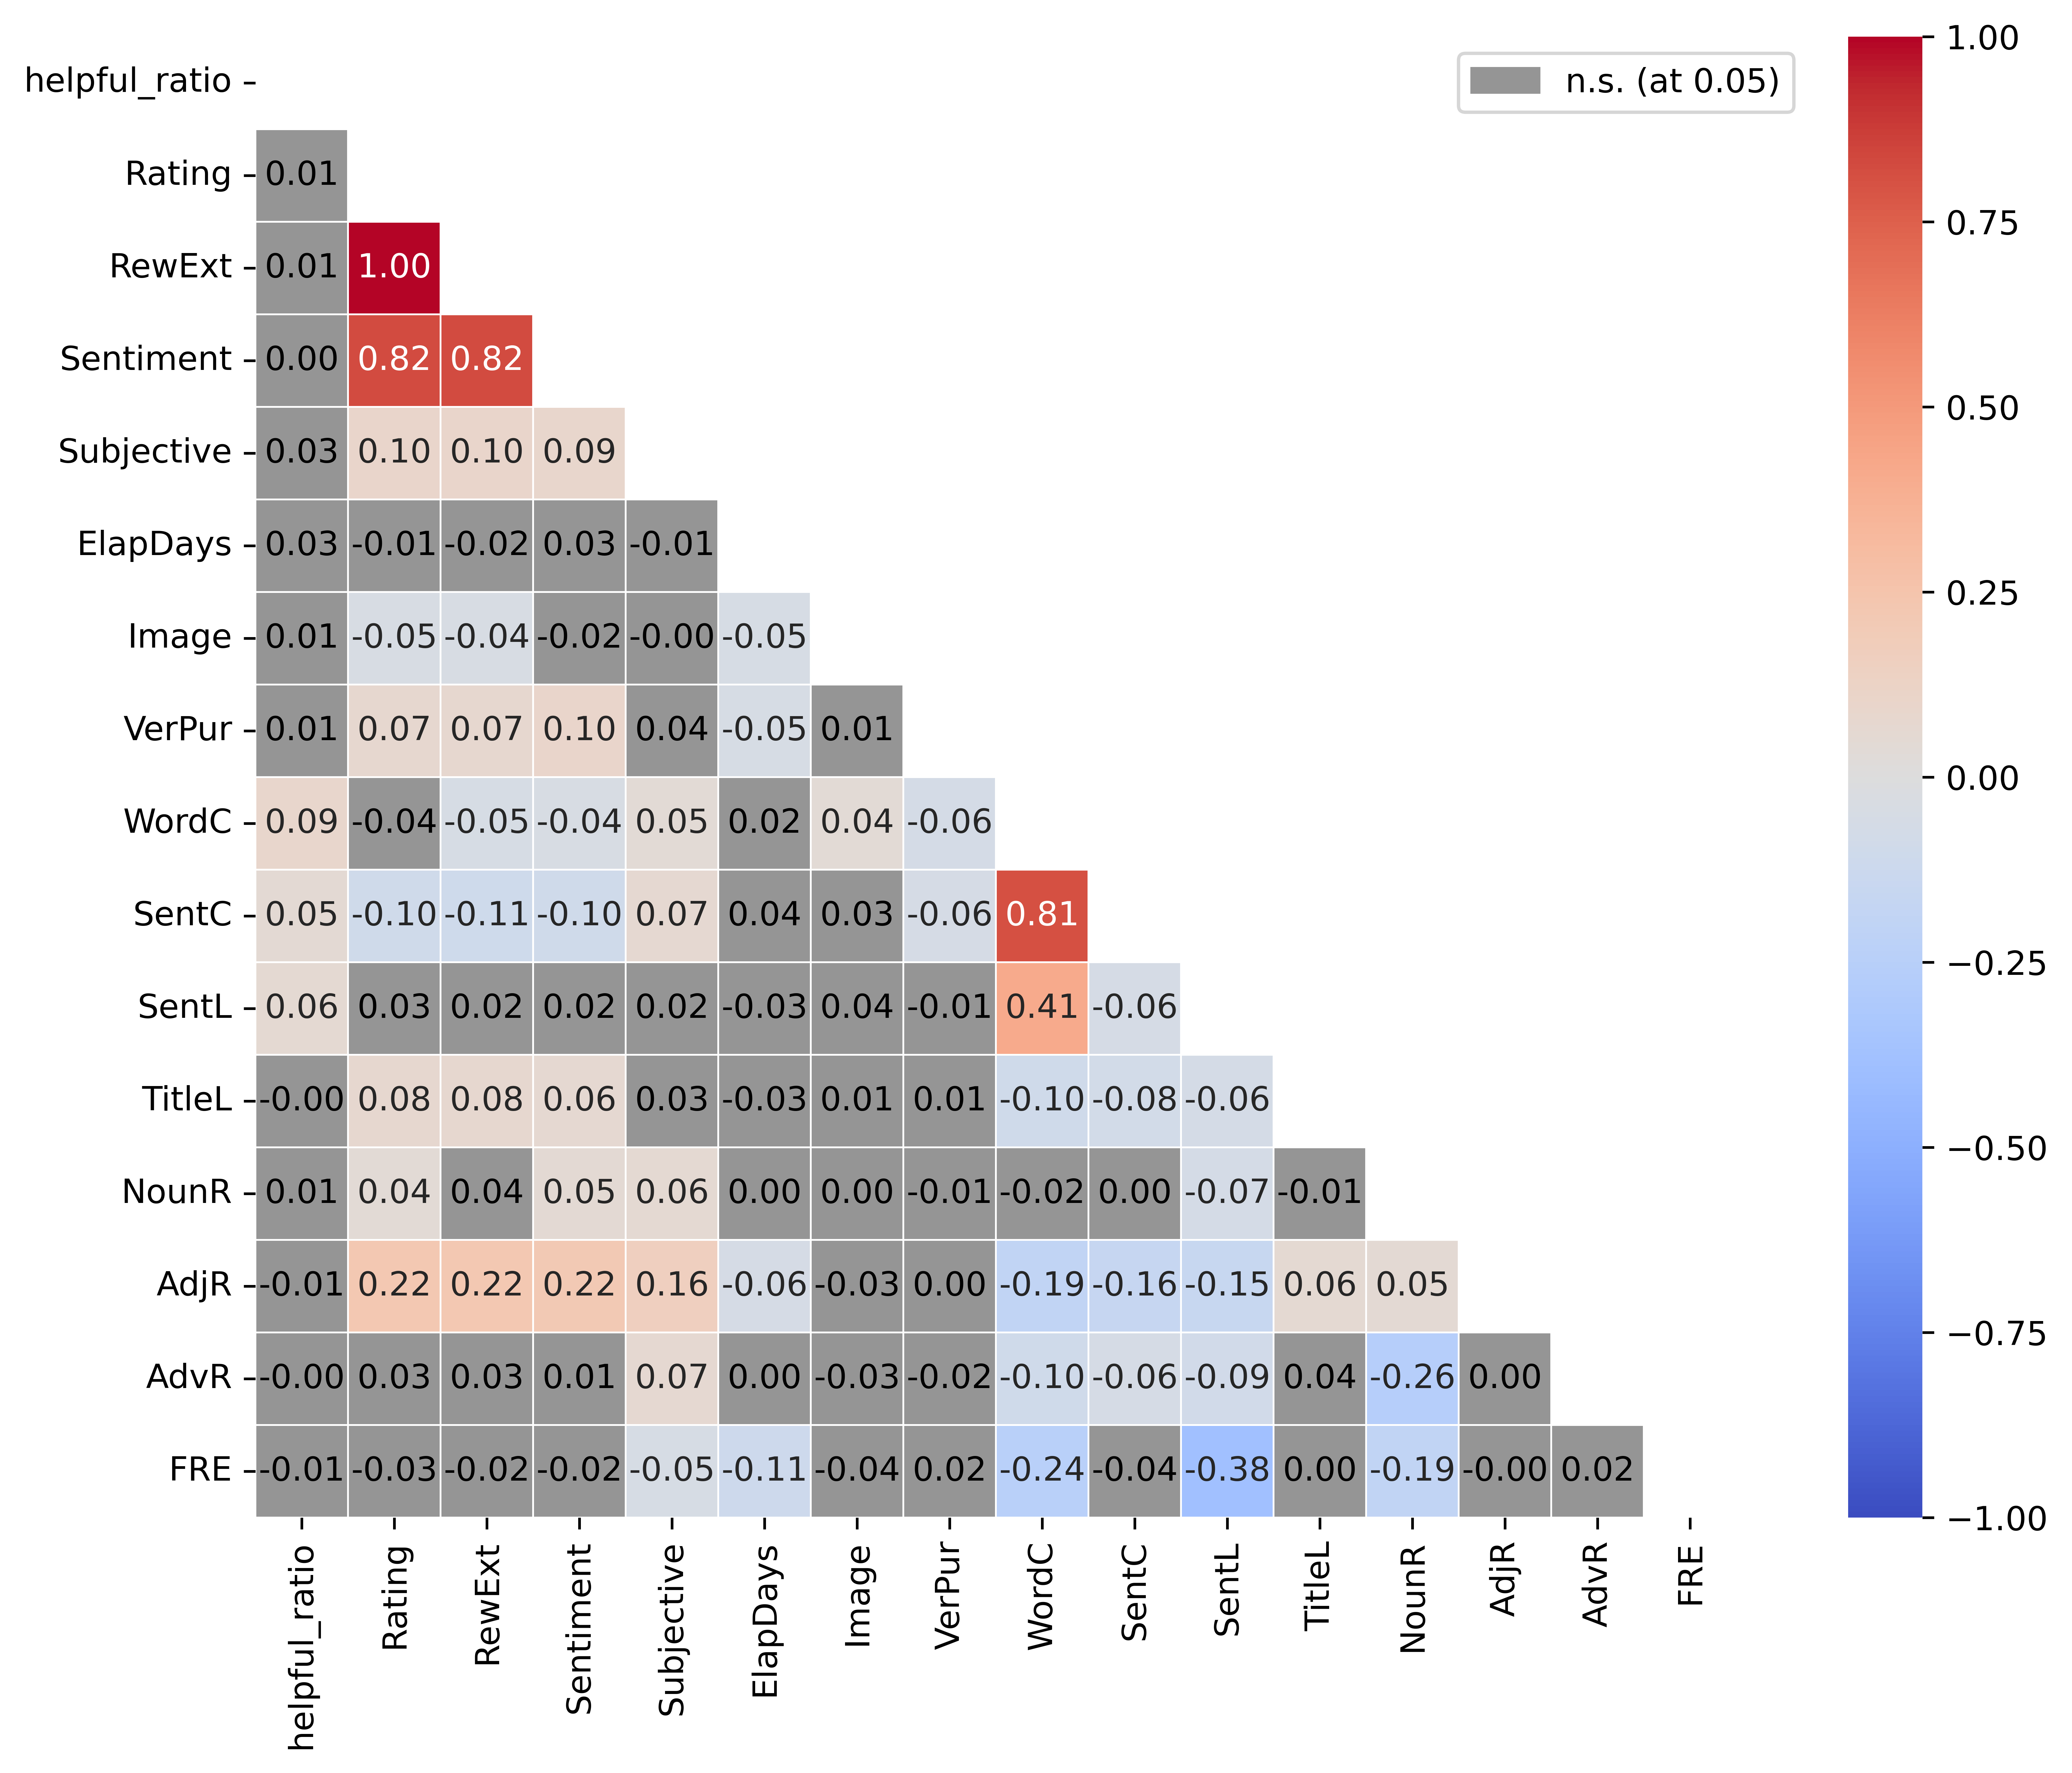

In [75]:

# Calculate correlation matrix for utilitarian data
corr_matrix_uti = data_utilitarian[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_uti.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_utilitarian[features[i]], data_utilitarian[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_uti, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_uti, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_uti, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)

plt.show()

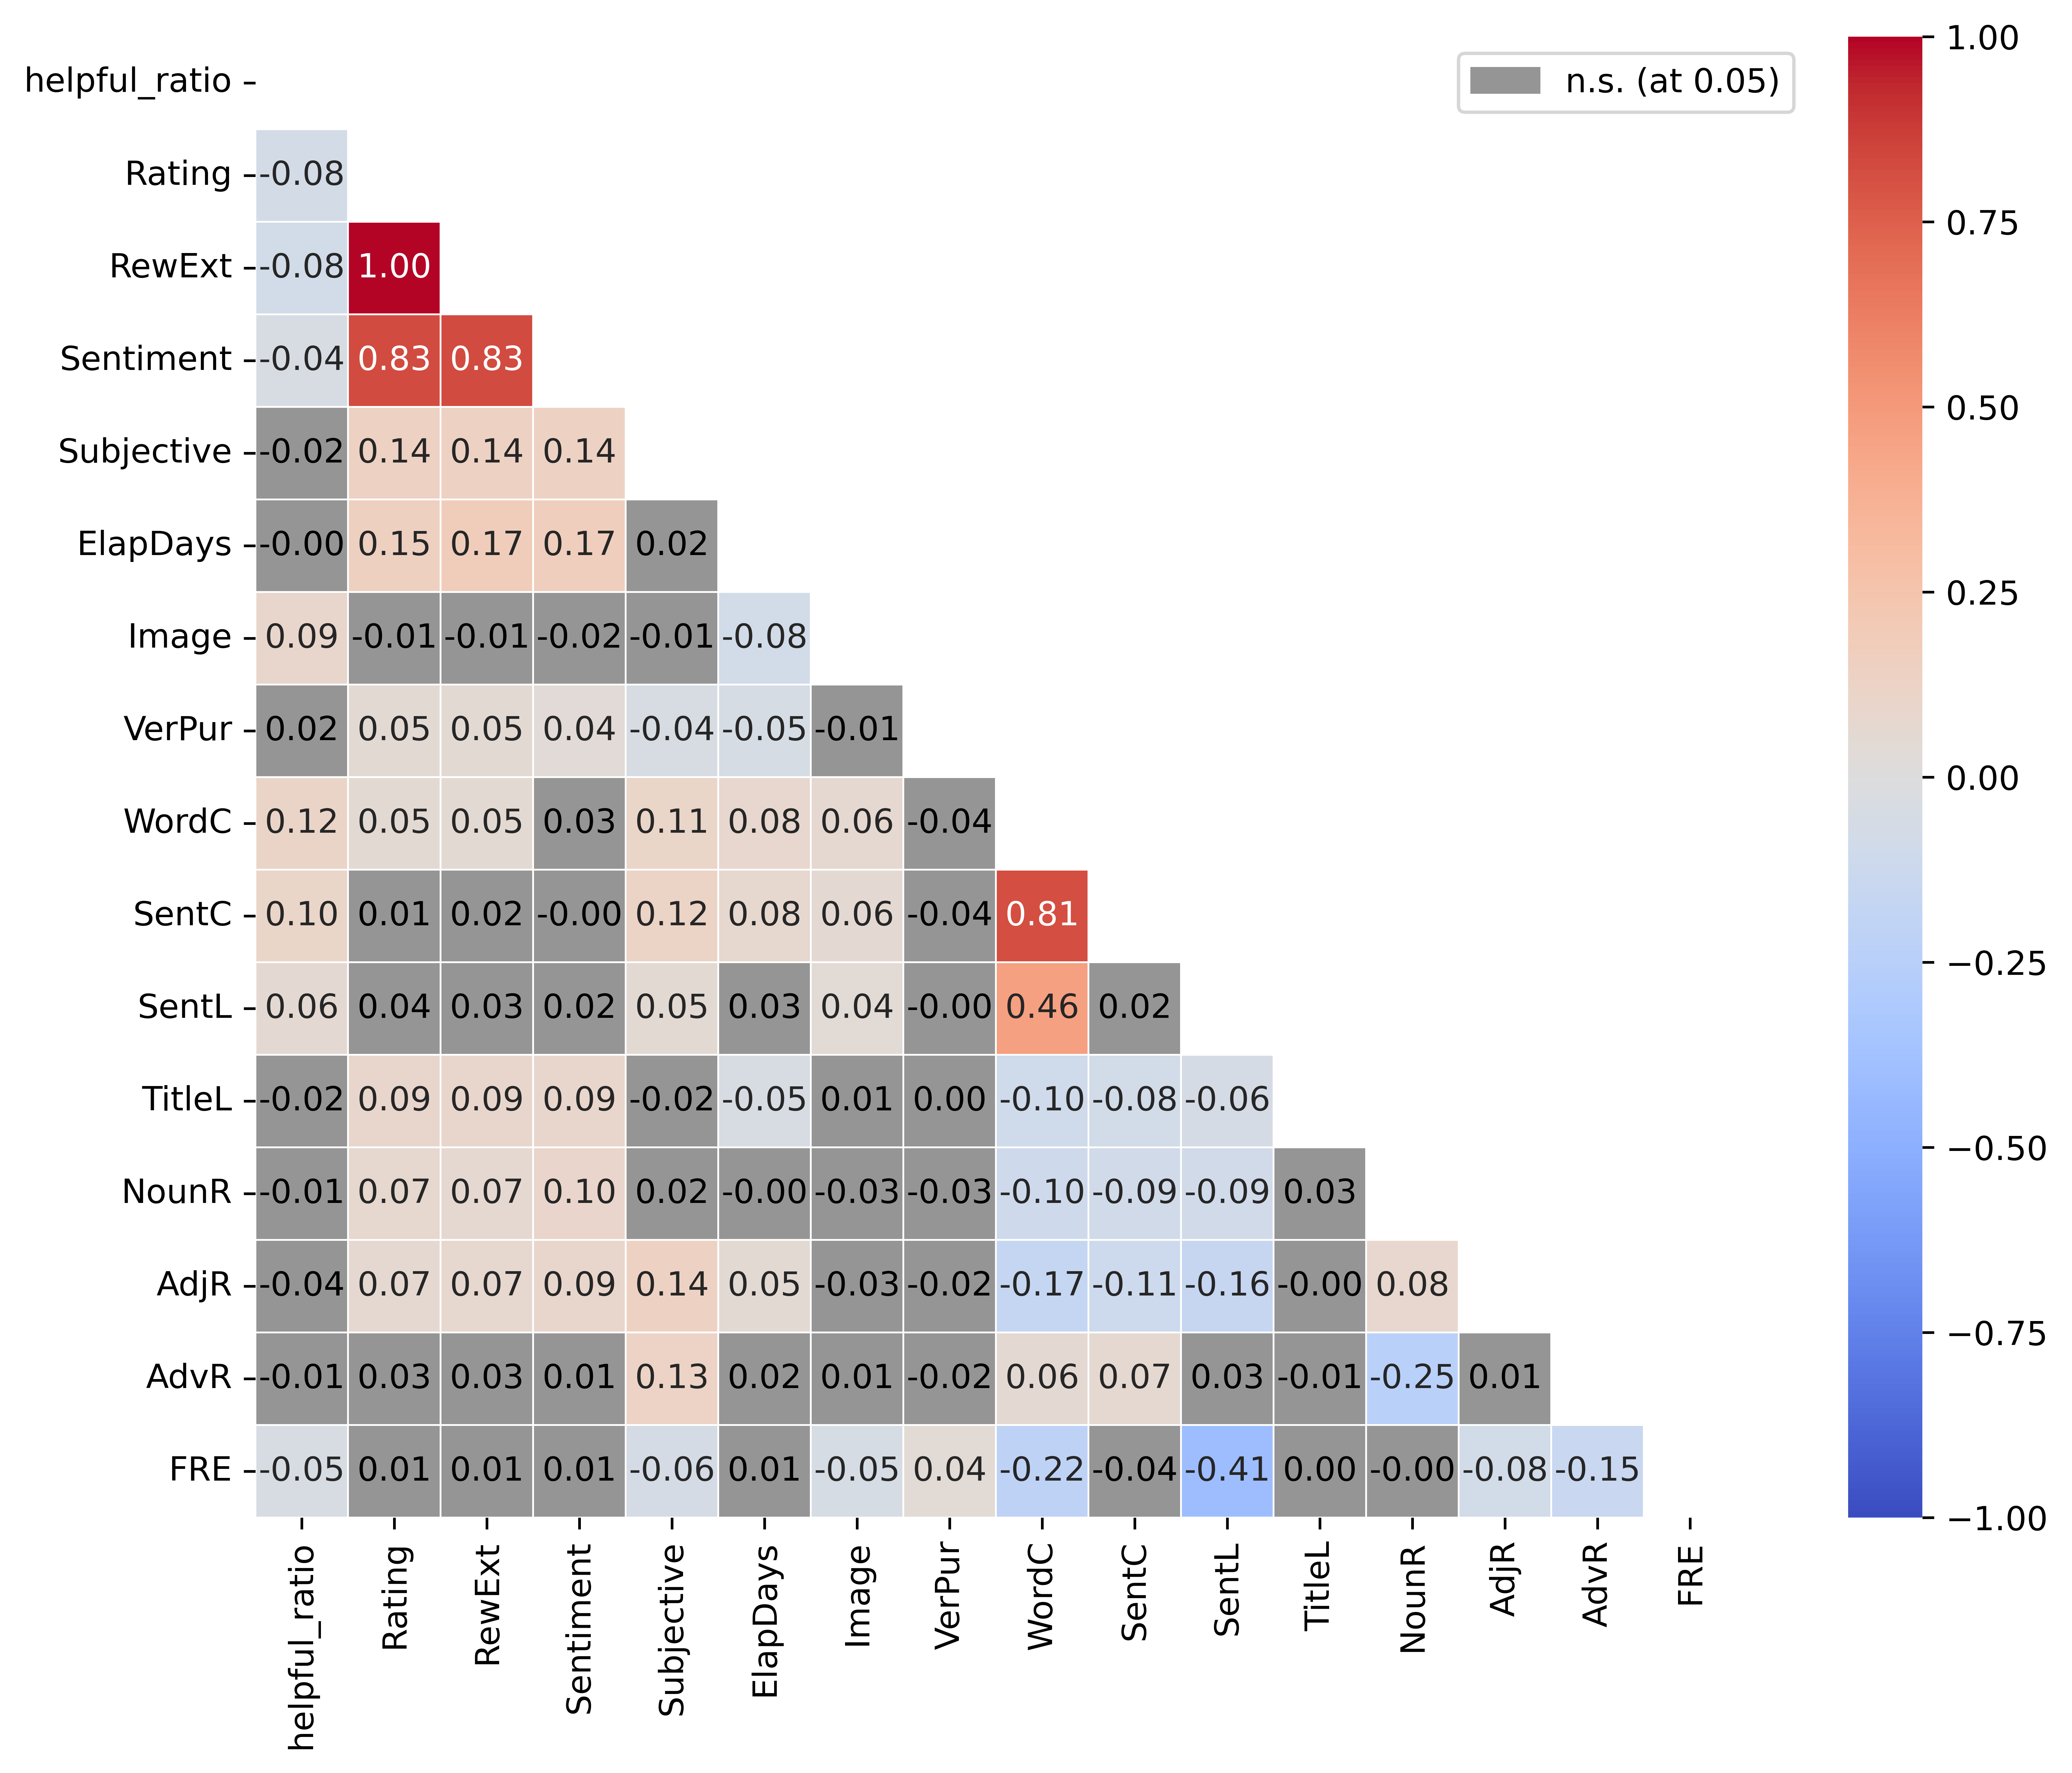

In [76]:
# Calculate correlation matrix
corr_matrix_hed = data_hedonic[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_hed.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_hedonic[features[i]], data_hedonic[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_hed, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_hed, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_hed, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)


plt.show()


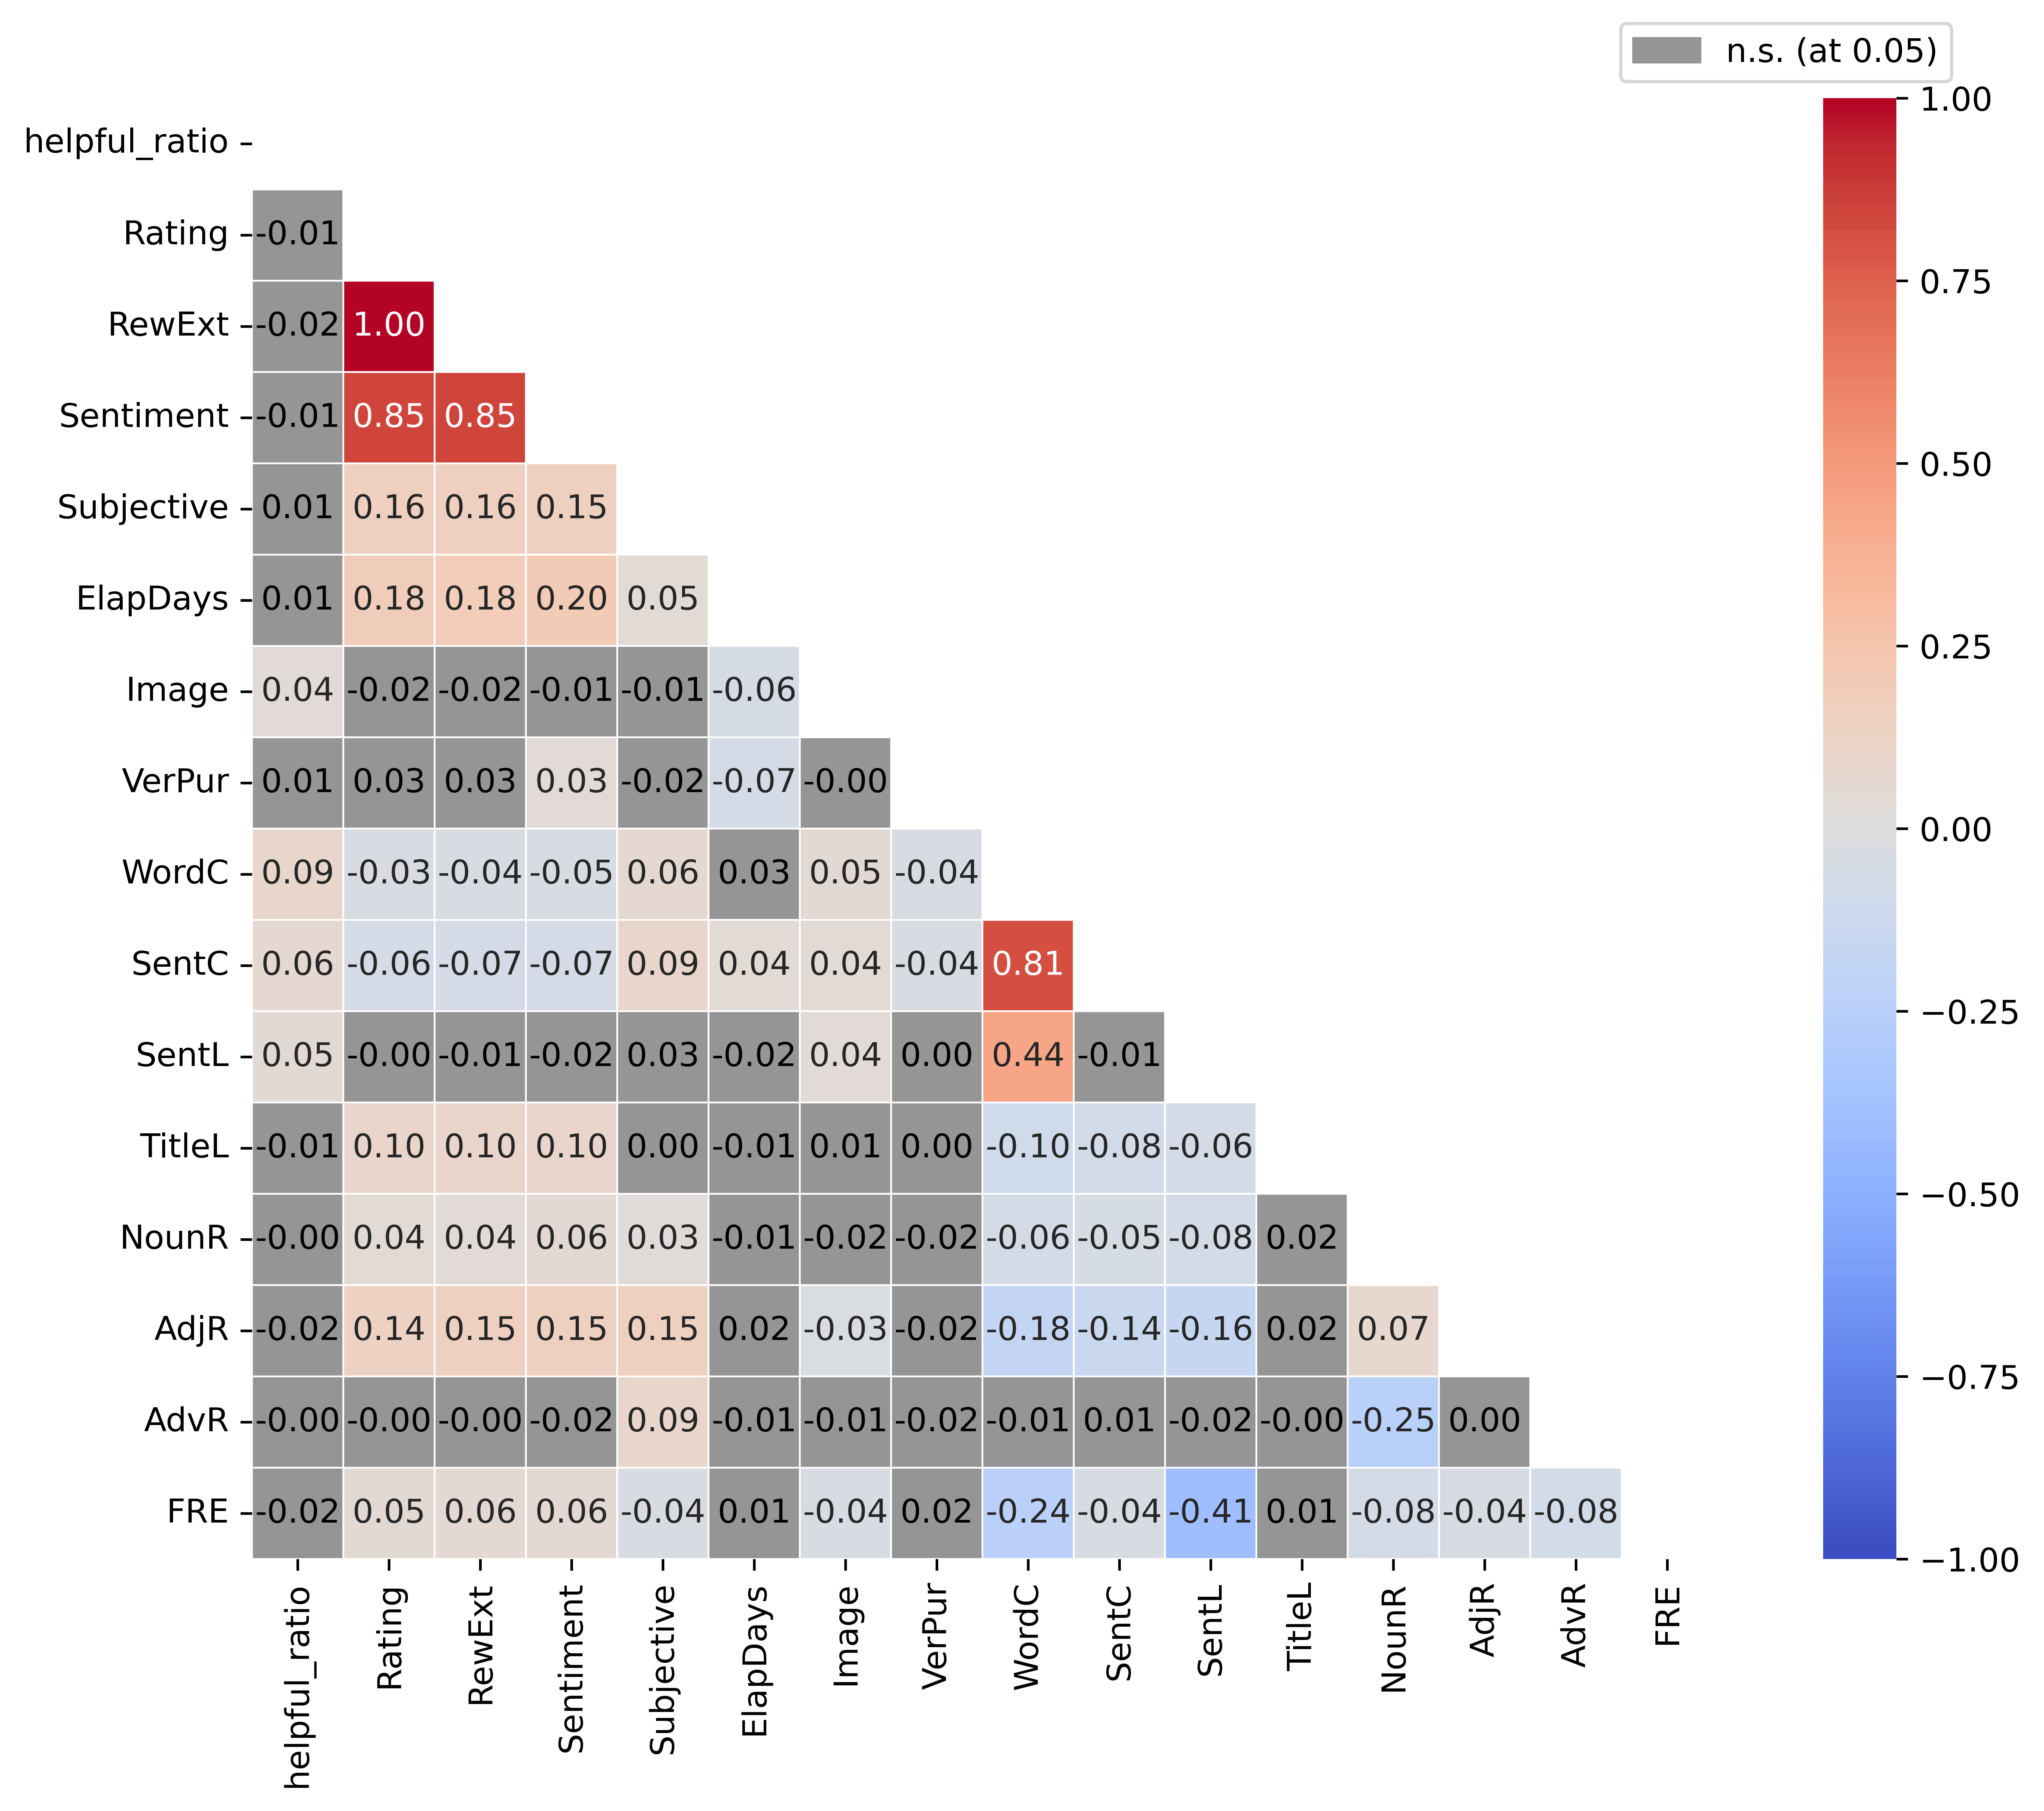

In [77]:
# Calculate correlation matrix
corr_matrix_total= data_helpful[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_total.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_helpful[features[i]], data_helpful[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_total, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_total, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_total, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc='lower center')


plt.show()

In [78]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(data_utilitarian['FRE'], data_utilitarian['Rating'])

print("Correlation coefficient between sentiment and rating:", correlation)
print("P-value:", p_value)


Correlation coefficient between sentiment and rating: -0.03250317817874545
P-value: 0.11095713238883821


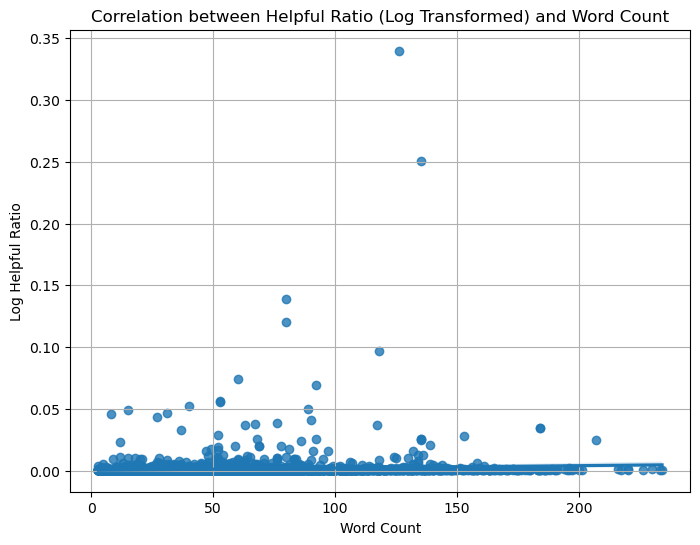

Correlation Coefficient: 0.09561413185022483


In [79]:
# Apply log transformation to 'Helpful_ratio'
data_helpful['log_Helpful_ratio'] = np.log(data_helpful['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_helpful)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_helpful['WordC'].corr(data_helpful['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)



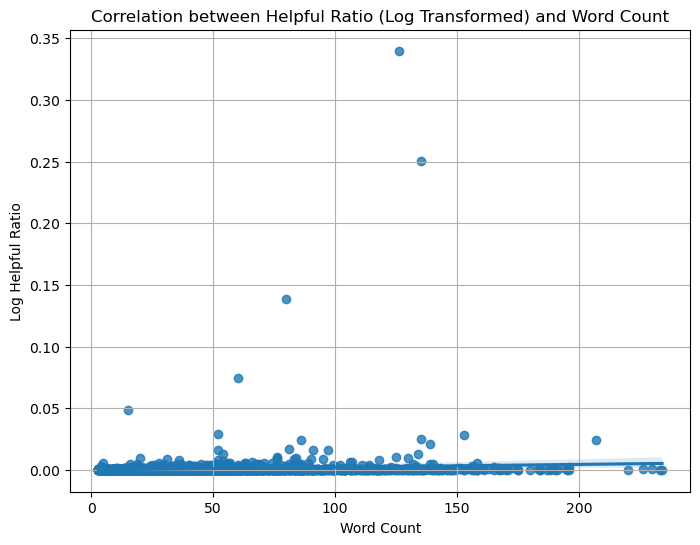

Correlation Coefficient: 0.08989399128975192


In [80]:
# Apply log transformation to 'Helpful_ratio'
data_utilitarian['log_Helpful_ratio'] = np.log(data_utilitarian['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_utilitarian)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_utilitarian['WordC'].corr(data_utilitarian['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


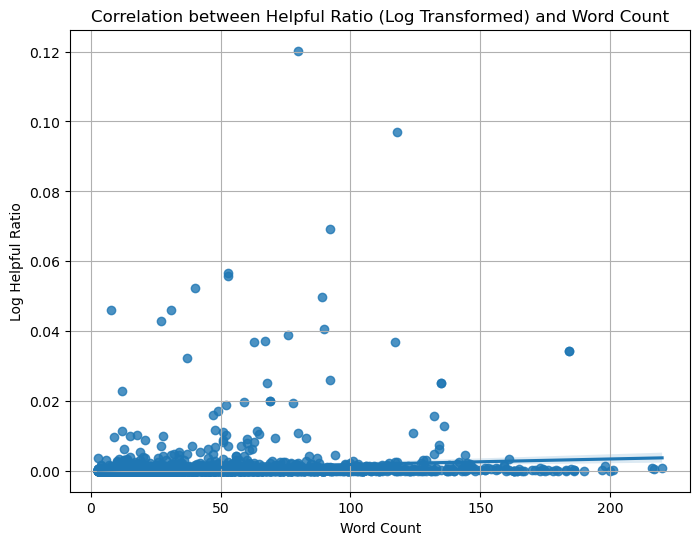

Correlation Coefficient: 0.11719525169958757


In [81]:
# Apply log transformation to 'Helpful_ratio'
data_hedonic['log_Helpful_ratio'] = np.log(data_hedonic['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_hedonic)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_hedonic['WordC'].corr(data_hedonic['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


# 4. Graphs and Plots for Data analysis 

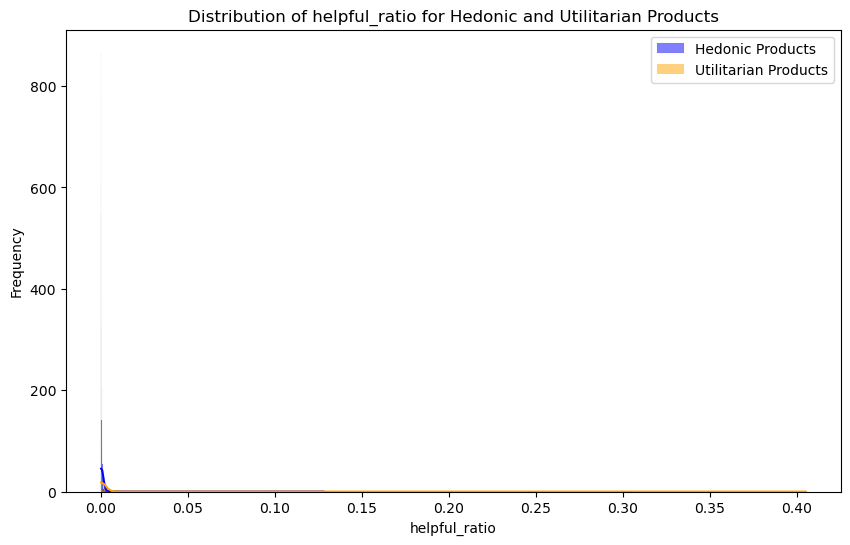

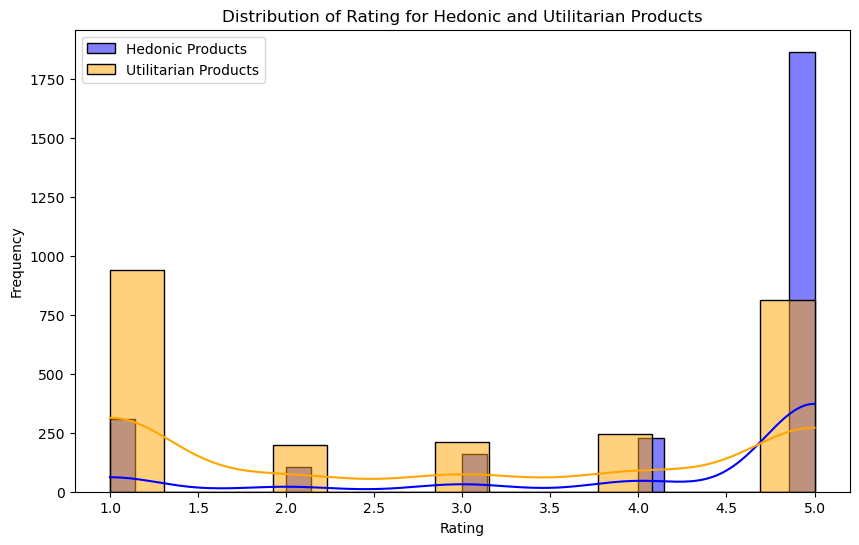

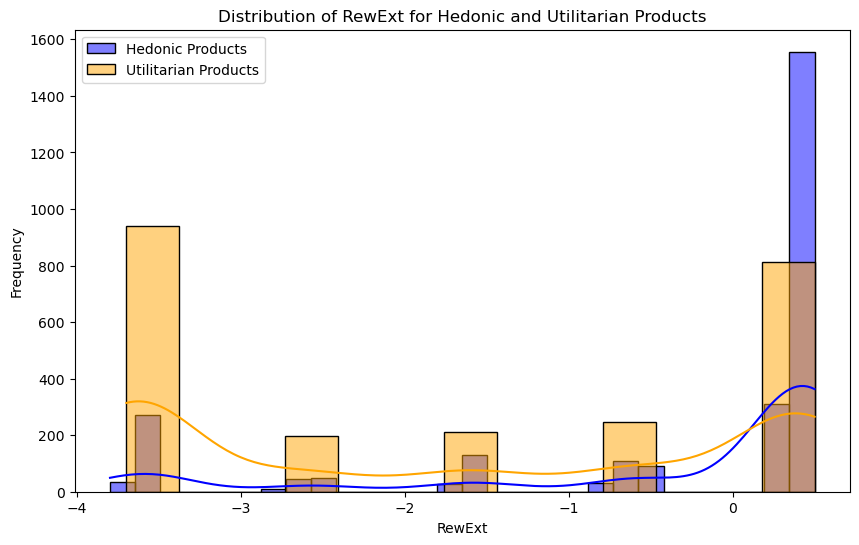

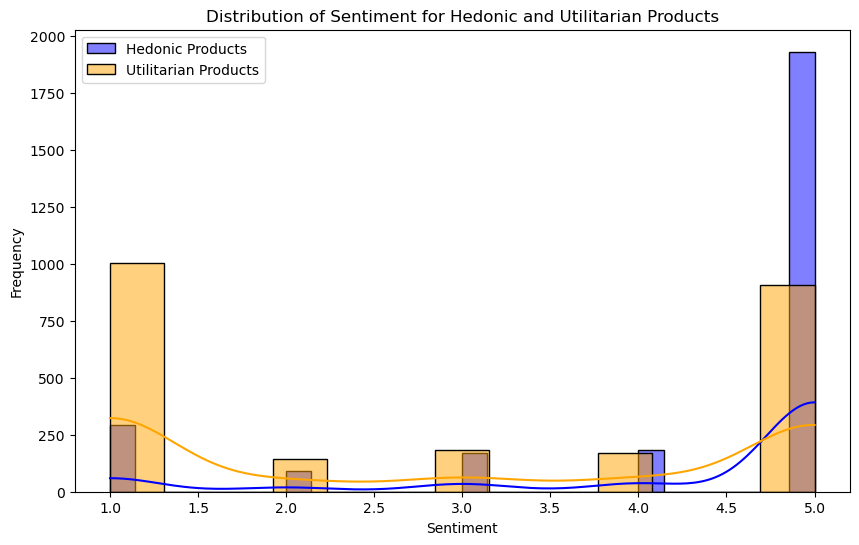

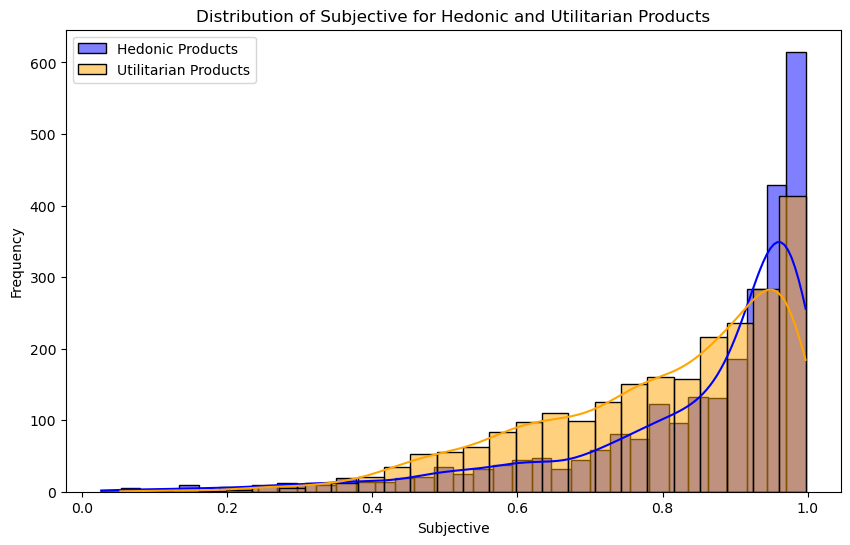

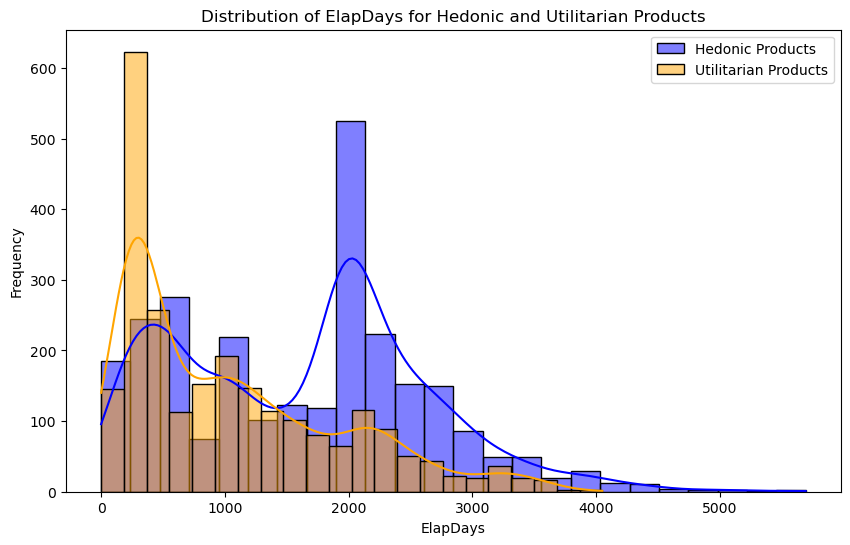

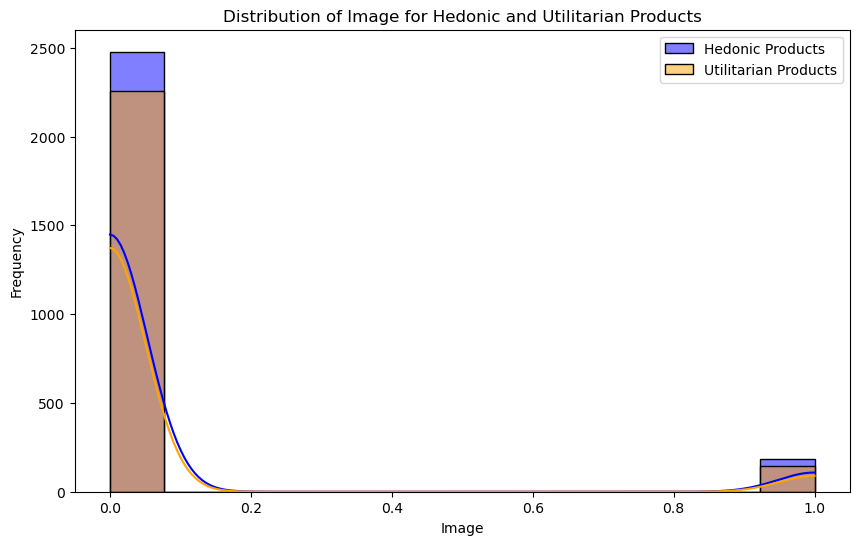

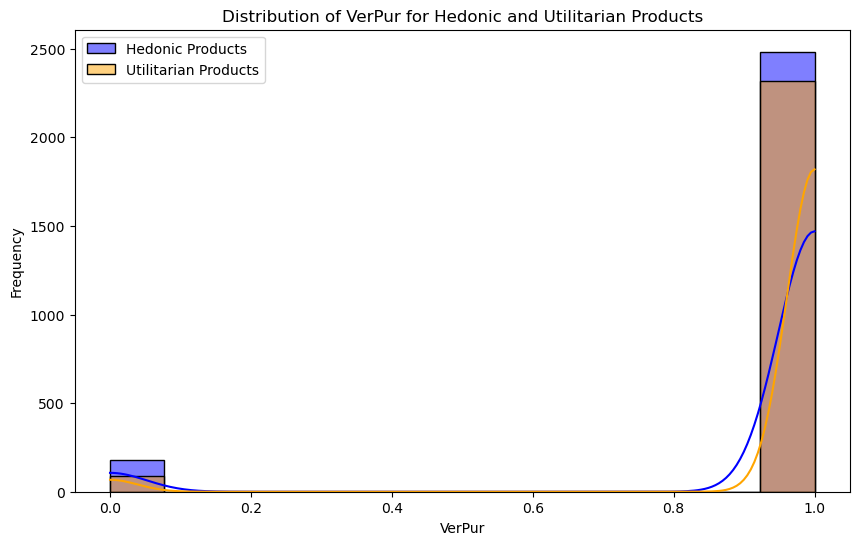

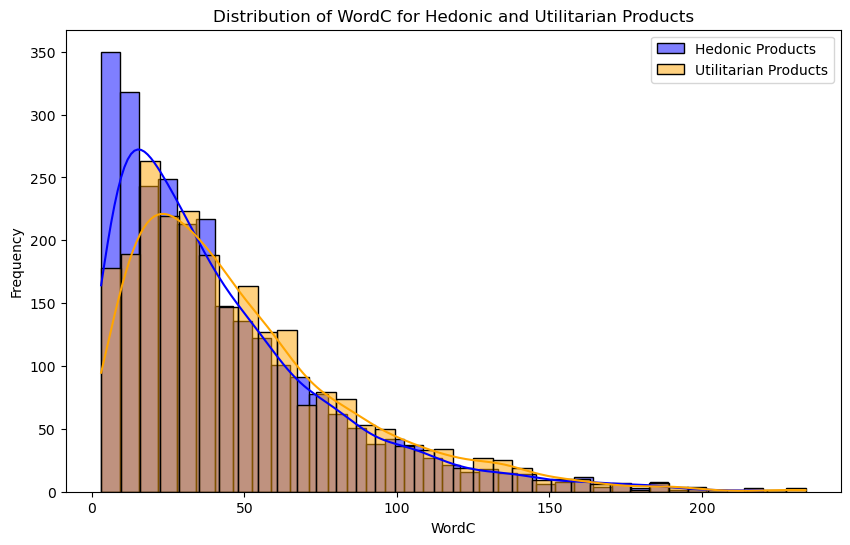

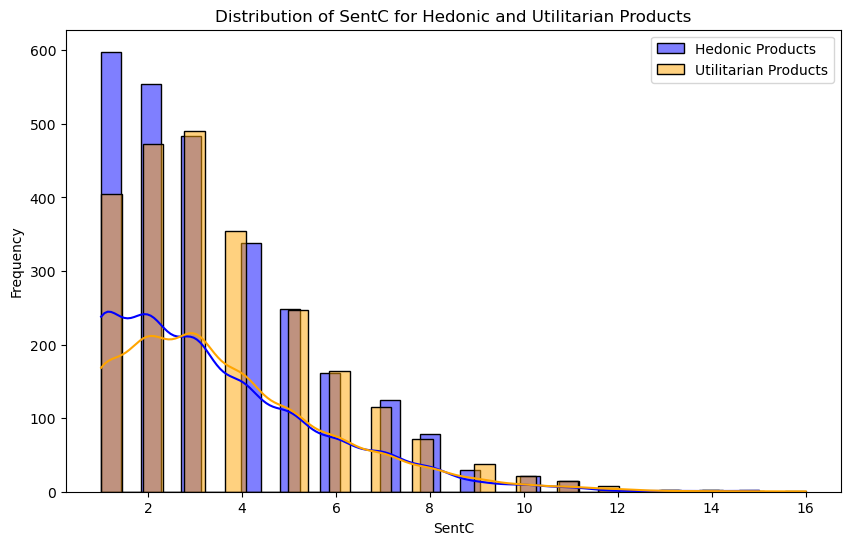

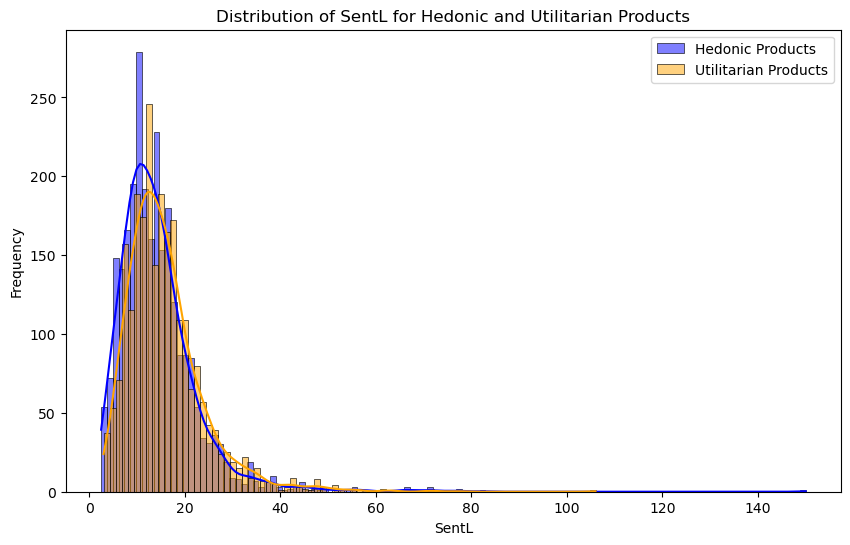

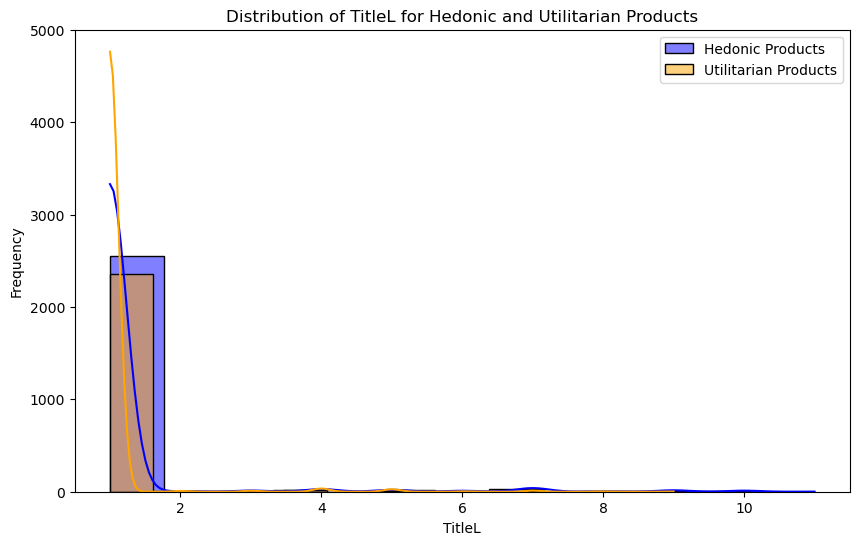

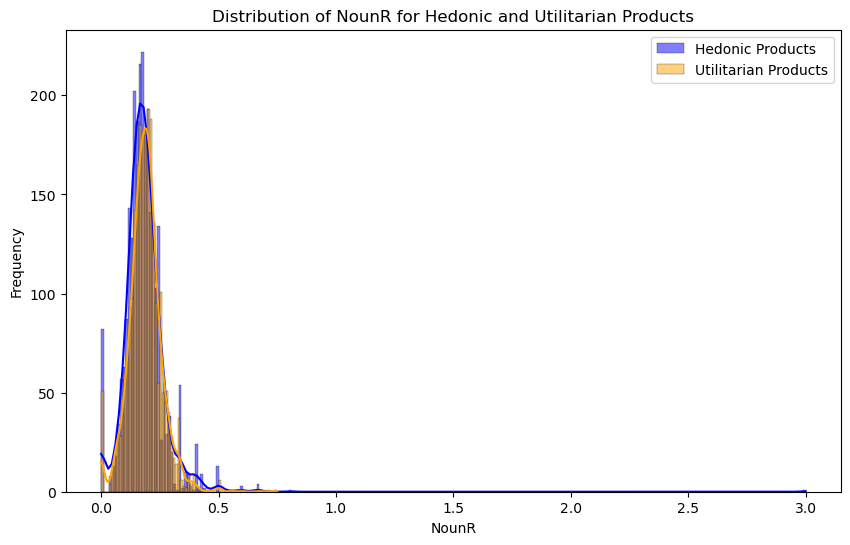

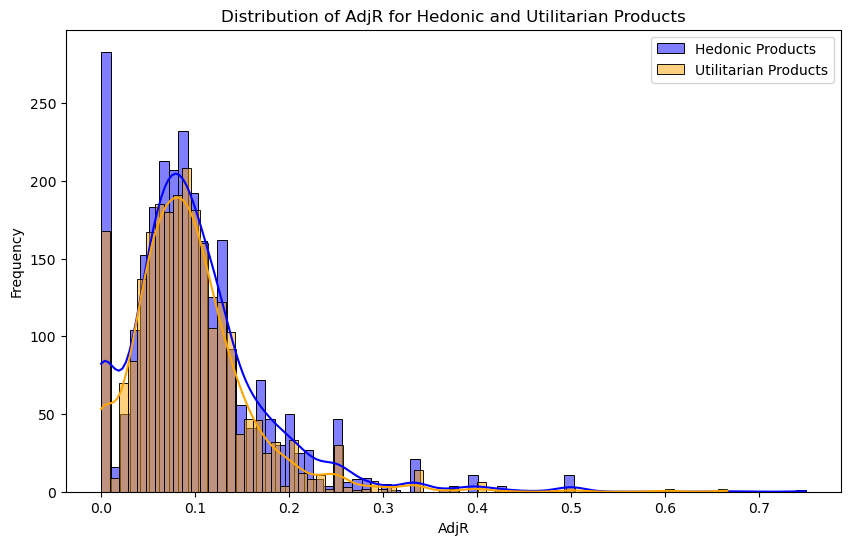

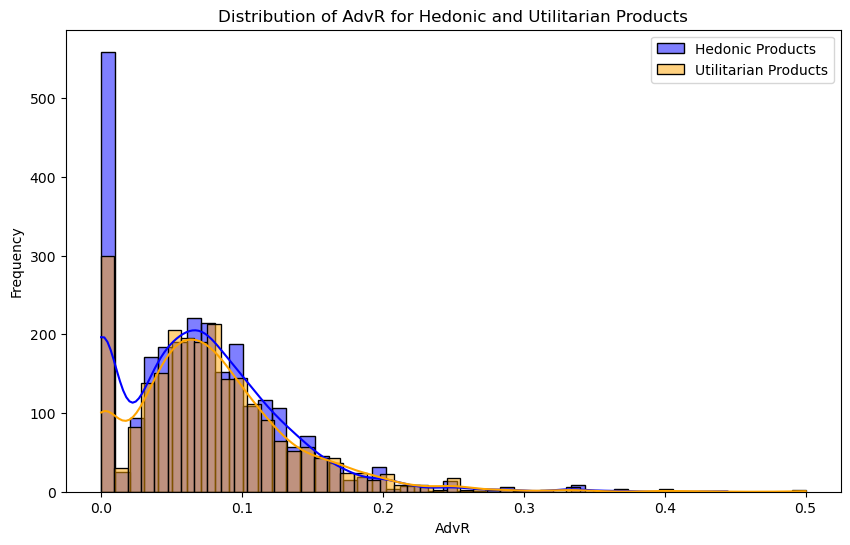

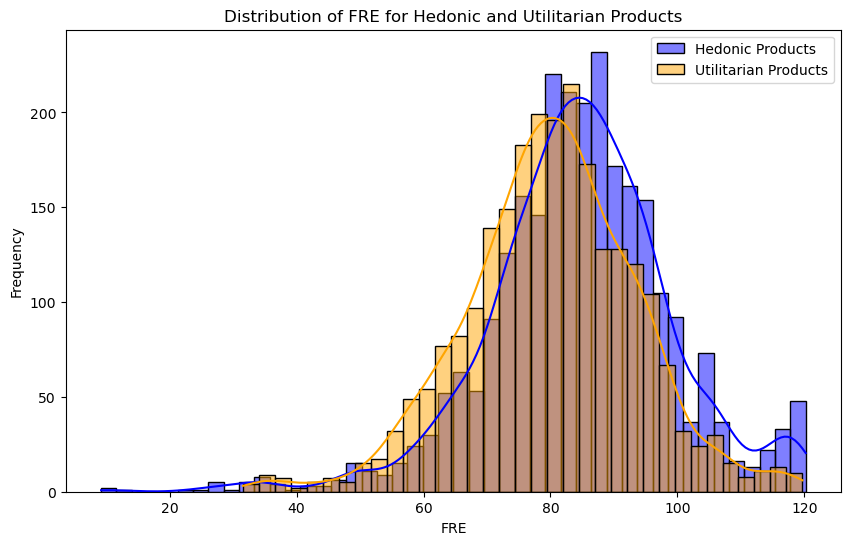

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features =  ['helpful_ratio','Rating','RewExt','Sentiment','Subjective', 'ElapDays',
            'Image', 'VerPur','WordC', 'SentC', 'SentL', 'TitleL',  'NounR', 'AdjR', 'AdvR', 'FRE']

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(data_hedonic[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(data_utilitarian[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


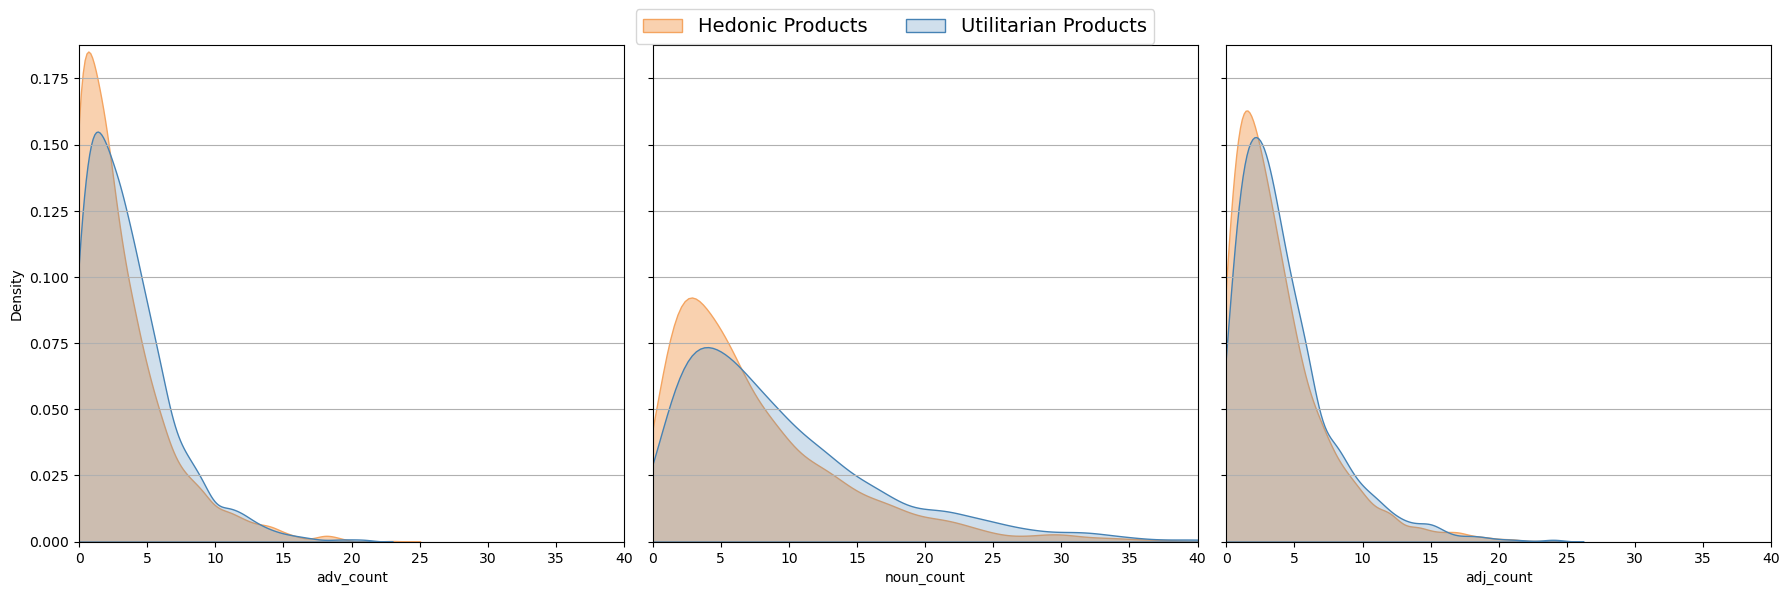

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the features of interest
features = ['adv_count', 'noun_count', 'adj_count']

# Set up the grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  
axes = axes.flatten()

# Find the overall x-axis and y-axis limits
x_min, x_max = 0, 40
y_max = 0

# Determine max y-axis value for proper scaling
for feature in features:
    data_combined = np.concatenate([data_hedonic[feature], data_utilitarian[feature]])
    kde = gaussian_kde(data_combined)
    y_vals = kde(np.linspace(x_min, x_max, 1000))
    combined_max_y = max(y_vals)
    if combined_max_y > y_max:
        y_max = combined_max_y

# Plot density plots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=data_hedonic[feature], color='sandybrown', label='Hedonic Products', ax=ax, fill=True, alpha=0.5)
    sns.kdeplot(data=data_utilitarian[feature], color='steelblue', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_xlabel(feature)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max * 1.1)  # Adjusted to provide some extra space above the maximum density
    ax.yaxis.grid(True) 
    
    if i == 0:  # Set y-axis label only for the leftmost plot
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')  # Remove y-axis label for other plots
        ax.set_yticklabels([])  # Hide y-axis labels for other plots

    # Remove individual legends
    ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc= 'upper center', ncol=2, fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the legend
plt.show()


In [98]:
from scipy.stats import gaussian_kde

# Define the features of interest
features = ['Rating', 'SentimentC']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=1000)

sns.set_theme(style="whitegrid")

# Define the range for rating
x_range_rating = np.linspace(0, 6, 1000)
# Define the range for Sentiment Numerical
x_range_sentiment = np.linspace(-1, 3, 1000)

# Plot for 'Sentiment Numerical'
ax = axes[0]

# Plot KDE for hedonic products for Sentiment Numerical
hedonic_kde_sentiment = gaussian_kde(data_hedonic['SentimentC'])
hedonic_density_sentiment = hedonic_kde_sentiment(x_range_sentiment)
ax.plot(x_range_sentiment, hedonic_density_sentiment, color='sandybrown', label='Hedonic Products')
ax.fill_between(x_range_sentiment, hedonic_density_sentiment, color='sandybrown', alpha=0.6)

# Plot KDE for utilitarian products for Sentiment Numerical
utilitarian_kde_sentiment = gaussian_kde(data_utilitarian['SentimentC'])
utilitarian_density_sentiment = utilitarian_kde_sentiment(x_range_sentiment)
ax.plot(x_range_sentiment, utilitarian_density_sentiment, color='steelblue', label='Utilitarian Products')
ax.fill_between(x_range_sentiment, utilitarian_density_sentiment, color='steelblue', alpha=0.6)

# Set properties for Sentiment Numerical plot
ax.set_xlabel('Sentiment')
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0,1.85)
ax.set_ylabel('')  # Remove y-axis label for the right plot
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Density')  # Show y-axis label only for the left plot
ax.yaxis.grid(False)
ax.xaxis.grid(False)


# Add horizontal gridlines for the y-axis manually
for y in np.linspace(ax.get_ylim()[1], ax.get_ylim()[0], 5)[1:-1]:
    ax.axhline(y=y, color='grey', linestyle='-', linewidth=0.4)

axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for 'rating'
ax = axes[1]

# Plot KDE for hedonic products for rating
hedonic_kde_rating = gaussian_kde(data_hedonic['Rating'])
hedonic_density_rating = hedonic_kde_rating(x_range_rating)
ax.plot(x_range_rating, hedonic_density_rating, color='sandybrown', label='Hedonic')
ax.fill_between(x_range_rating, hedonic_density_rating, color='sandybrown', alpha=0.6)

# Plot KDE for utilitarian products for rating
utilitarian_kde_rating = gaussian_kde(data_utilitarian['Rating'])
utilitarian_density_rating = utilitarian_kde_rating(x_range_rating)
ax.plot(x_range_rating, utilitarian_density_rating, color='steelblue', label='Utilitarian')
ax.fill_between(x_range_rating, utilitarian_density_rating, color='steelblue', alpha=0.6)

# Set properties for rating plot
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.set_xlabel('Rating')
ax.set_xlim(0.1, 5.9)  # Limit x-axis to 5.5
ax.set_ylim(0, max(np.max(hedonic_density_rating), np.max(utilitarian_density_rating), np.max(hedonic_density_sentiment), np.max(utilitarian_density_sentiment)) * 1.1)
ax.legend(loc='upper right', title='Product Type', title_fontsize='medium',frameon=True)
ax.yaxis.set_visible(False)

axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)


# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='12', fontsize='12', loc='upper right', frameon=True)


# Add horizontal gridlines for the y-axis manually
for y in np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)[1:-1]:
    ax.axhline(y=y, color='grey', linestyle='-', linewidth=0.4)

# Add gridlines for the x-axis

# Adjust layout
plt.tight_layout()
plt.show()


In [96]:
# Adding the 'helpful' column to the data dictionary
data['helpful'] = [votes >= 1 for votes in data['helpful_vote']]

# Creating the DataFrame with the updated data dictionary
data = pd.DataFrame(data)


# Display the updated DataFrame
print(data)

       Rating                                            title_x  \
0         5.0                                          Love this   
1         5.0  The fun games that you remember.. now on the N...   
2         5.0                                      So much fun!!   
3         5.0                              Wish this had more...   
4         5.0    It is the physical copy and it is a good price.   
...       ...                                                ...   
16466     5.0                                  Really cool mouse   
16467     3.0                         the clicks are not durable   
16468     5.0                                        Great mouse   
16469     1.0                 Double click issues after 3 months   
16470     1.0  Cable stopped working only 4 months after purc...   

                                                    text images        asin  \
0      My kids have so much fun with this game. Its a...     []  B01N1081RO   
1      These are 3 of the

In [86]:
# Apply log transformation to the 'word_count' and 'sent_length' columns
data['log_word_count'] = np.log1p(data['WordC'])
data['log_sent_length'] = np.log1p(data['SentL'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=1000)

# Increase the font size of the x-axis and y-axis labels in the left plot
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot violin plot for log-transformed word_count
sns.violinplot(ax=axes[0], x="helpful_label", y="log_word_count", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[0].set_ylabel("log (word_count)", size=12)
axes[0].set_xlabel("")
axes[0].legend_.remove()  # Remove legend from the first plot

# Set the y-axis limit for the first plot
y_max_word_count = data['log_word_count'].max()
axes[0].set_ylim(0, y_max_word_count * 1.045)

# Increase the font size of the x-axis and y-axis labels in the right plot
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Plot violin plot for log-transformed sent_length
sns.violinplot(ax=axes[1], x="helpful_label", y="log_sent_length", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[1].set_ylabel("log (sent_length)", size=12)
axes[1].set_xlabel("")

# Set the y-axis limit for the second plot
y_max_sent_length = data['log_sent_length'].max()
axes[1].set_ylim(0, y_max_sent_length * 1.1)

# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='12', fontsize='12', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


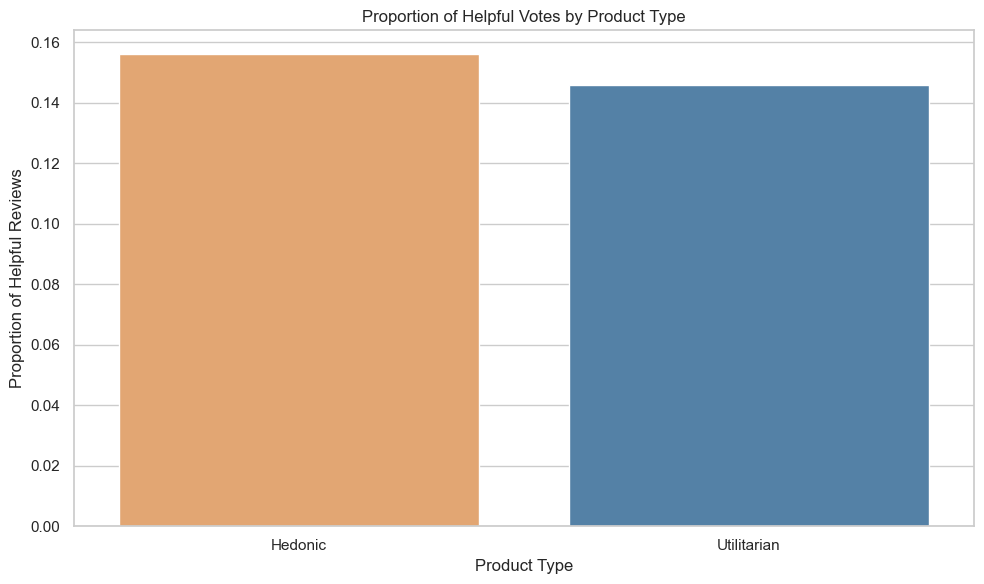

In [87]:
# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data['helpful_label'] = data['helpful'].map({True: 'Helpful', False: 'Not Helpful'})

# Calculate the proportion of helpful reviews for each product type
helpful_proportion = data.groupby('prod_type_label')['helpful'].mean().reset_index()

# Set the theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("Proportion of Helpful Reviews")
plt.xlabel("Product Type")
plt.title("Proportion of Helpful Votes by Product Type")
plt.tight_layout()
plt.show()

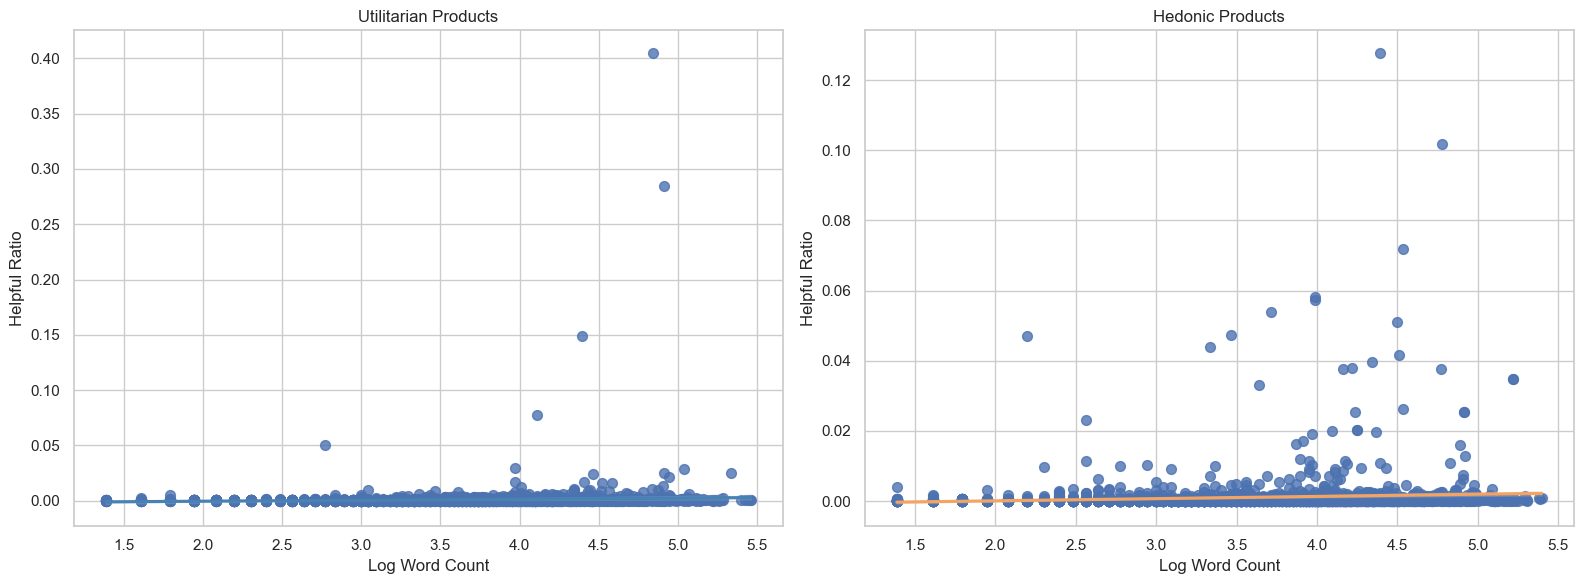

In [89]:
# Log-transform the word_count
data_helpful['log_word_count'] = np.log1p(data_helpful['WordC'])

# Map product types to labels
data_helpful['prod_type_label'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for Utilitarian products
sns.regplot(ax=axes[0], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 0], scatter_kws={'s': 50}, line_kws={'color': 'steelblue'})
axes[0].set_title('Utilitarian Products')
axes[0].set_xlabel('Log Word Count')
axes[0].set_ylabel('Helpful Ratio')

# Scatter plot with regression line for Hedonic products
sns.regplot(ax=axes[1], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 1], scatter_kws={'s': 50}, line_kws={'color': 'sandybrown'})
axes[1].set_title('Hedonic Products')
axes[1].set_xlabel('Log Word Count')
axes[1].set_ylabel('Helpful Ratio')

plt.tight_layout()
plt.show()

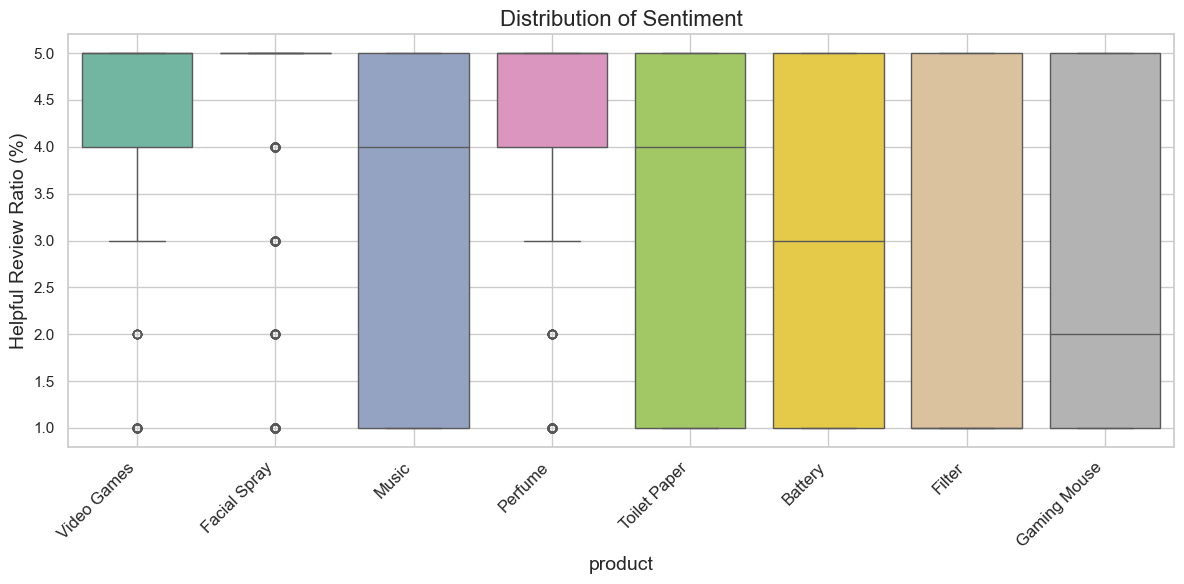

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot for hedonic products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Prod', y='Sentiment', data=data_helpful, palette='Set2')
plt.title('Distribution of Sentiment', fontsize=16)
plt.xlabel('product', fontsize=14)
plt.ylabel('Helpful Review Ratio (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


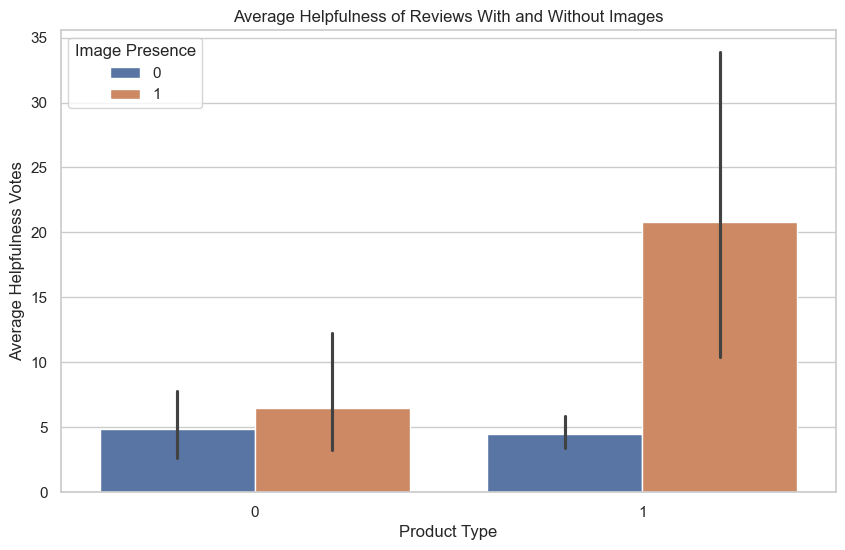

In [93]:
# Calculate average helpfulness for reviews with and without images
avg_helpfulness = data_helpful.groupby(['prod_type', 'Image'])['helpful_vote'].mean

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data_helpful, x='prod_type', y='helpful_vote', hue='Image')
plt.title('Average Helpfulness of Reviews With and Without Images')
plt.xlabel('Product Type')
plt.ylabel('Average Helpfulness Votes')
plt.legend(title='Image Presence')
plt.show()

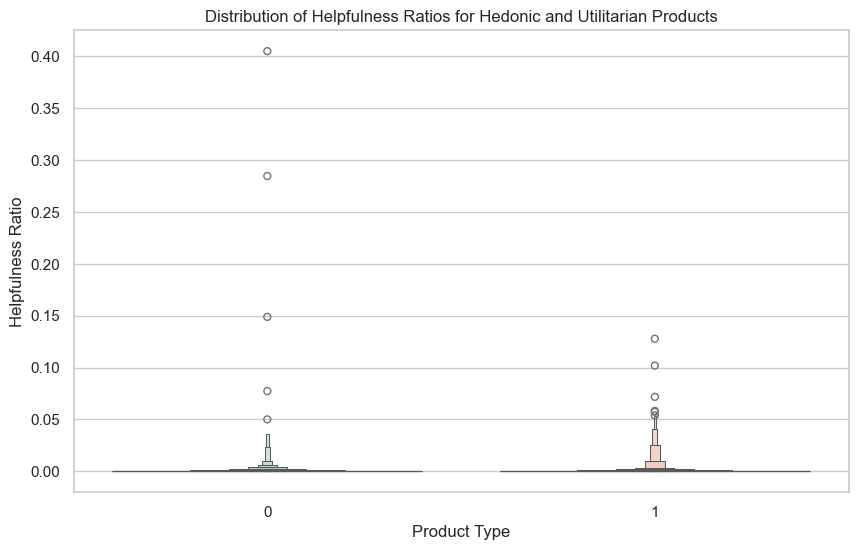

In [94]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data_helpful, x='prod_type', y='helpful_ratio', palette='Set2')
plt.title('Distribution of Helpfulness Ratios for Hedonic and Utilitarian Products')
plt.xlabel('Product Type')
plt.ylabel('Helpfulness Ratio')
plt.show()
